# Playing Pac-Man with Deep Q-Learning

Parts of this notebook has been reproduced from the [Hands-On Machine Learning with Scikit-Learn and TensorFlow](https://www.amazon.co.uk/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291) book.

Additional installation of packages is required to get this working:
- For windows: `pip install --no-index -f https://github.com/Kojoley/atari-py/releases atari_py`

From [this](https://stackoverflow.com/a/46739299/490332) stackoverflow question. 

Testing the environment to ensure everything is working:

In [9]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [3]:
env = gym.make('MsPacman-v0')
obs = env.reset()
obs.shape

(210, 160, 3)

In [4]:
env.action_space

Discrete(9)

We have 9 discrete possible actions to mimic those possible on the joystick:
- left
- right
- up
- down
- centre
- upper left
- upper right
- lower left
- lower right

The observations of the game are 3D numpy arrays. To increase computation speed, the 3D arrays will be converted to greyscale and also reduced in resolution to 88 x 80 with the following function:

In [6]:
pacman = np.array([210, 164, 74]).mean()
def preprocess_game_imge(observation: np.array) -> np.array:
    img = obs[1:176:2, ::2]
    img = img.mean(axis=2)
    img[img==pacman] = 0 # improve the constrast of pacman
    img = (img - 128) / 128 - 1 # normalise from -1 to 1
    return img.reshape(88, 80, 1)

In [8]:
preprocess_game_imge(obs).shape

(88, 80, 1)

(-0.5, 79.5, 87.5, -0.5)

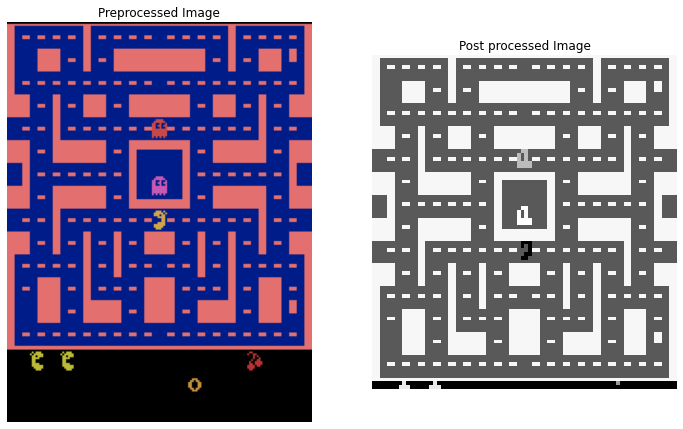

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(obs)
ax[0].set_title('Preprocessed Image')
ax[0].axis('off')
ax[1].imshow(preprocess_game_imge(obs).reshape(88, 80), interpolation='nearest', cmap='gray')
ax[1].set_title('Post processed Image')
ax[1].axis('off')